# Exercise 3

In [3]:
# Import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

## Ideal filters

In [4]:
def ideal_lowpass(img, d0):
    h,w = img.shape
    
    img_fft = np.fft.fft2(img)    
    img_fft = np.fft.fftshift(img_fft)
    
    for row in range(h):
        for col in range(w):
            du = row - h / 2
            dv = col - w / 2
            if sqrt( du**2 + dv**2 ) > d0:
                img_fft[row,col] = 0
    
    img_fft = np.fft.fftshift(img_fft)
    real_img = np.fft.ifft2(img_fft).astype('int')
    return real_img

def ideal_highpass(img, d0):
    h,w = img.shape
    
    img_fft = np.fft.fft2(img)
    img_fft = np.fft.fftshift(img_fft)
    
    for row in range(h):
        for col in range(w):
            du = row - h / 2
            dv = col - w / 2
            if sqrt( du**2 + dv**2 ) <= d0:
                img_fft[row,col] = 0
                
    img_fft = np.fft.fftshift(img_fft)
    real_img = np.fft.ifft2(img_fft).astype('int')
    return real_img

## Buttwerworth filters

In [5]:
def lowpass_butterworth(img, d0, n = 1):
    h,w = img.shape
    
    img_fft = np.fft.fft2(img)    
    img_fft = np.fft.fftshift(img_fft)
    
    for row in range(h):
        for col in range(w):
            du = row - h / 2
            dv = col - w / 2
            root = sqrt( du**2 + dv**2 )
            if d0 != 0:
                img_fft[row,col] *= 1.0 / sqrt( 1.0 + (root / d0) ** (2*n) )
    
    img_fft = np.fft.fftshift(img_fft)
    real_img = np.abs(np.fft.ifft2(img_fft)).astype('int')
    return real_img

def highpass_butterworth(img, d0, n = 1):
    h,w = img.shape
    
    img_fft = np.fft.fft2(img)    
    img_fft = np.fft.fftshift(img_fft)
    
    for row in range(h):
        for col in range(w):
            du = row - h / 2
            dv = col - w / 2
            root = sqrt( du**2 + dv**2 )
            if root != 0:
                img_fft[row,col] *= 1.0 / sqrt( 1.0 + (d0 / root) ** (2*n) )
    
    img_fft = np.fft.fftshift(img_fft)
    real_img = np.abs(np.fft.ifft2(img_fft)).astype('int')
    return real_img

## Spatial filters

In [6]:
def blur(img, size):
    h,w = img.shape
    
    img_fft = np.fft.fft2(img)
    kernel = np.zeros(img.shape)
    
    for row in range(size):
        for col in range(size):
            kernel[row,col] = 1.0 / (size*size)
    
    kernel = np.fft.fft2(kernel)
    img_result = kernel * img_fft    
    
    real_img = np.fft.ifft2(img_result).astype('int')
    return real_img

def laplacian(img):
    h,w = img.shape
    
    img_fft = np.fft.fft2(img)
    kernel = np.zeros(img.shape)
    kernel[0,1] = -1
    kernel[2,1] = -1
    kernel[1,0] = -1
    kernel[1,2] = -1
    kernel[1,1] = 4
    
    kernel = np.fft.fft2(kernel)
    img_result = kernel * img_fft    
    
    real_img = np.fft.ifft2(img_result).astype('int')
    return real_img

def sobelx(img):
    h,w = img.shape
    
    img_fft = np.fft.fft2(img)
    kernel = np.zeros(img.shape)
    kernel[0,0] = -1
    kernel[1,0] = -2
    kernel[2,0] = -1
    kernel[0,2] = 1
    kernel[1,2] = 2
    kernel[2,2] = 1
    
    kernel = np.fft.fft2(kernel)
    img_result = kernel * img_fft    
    
    real_img = np.fft.ifft2(img_result).astype('int')
    return real_img

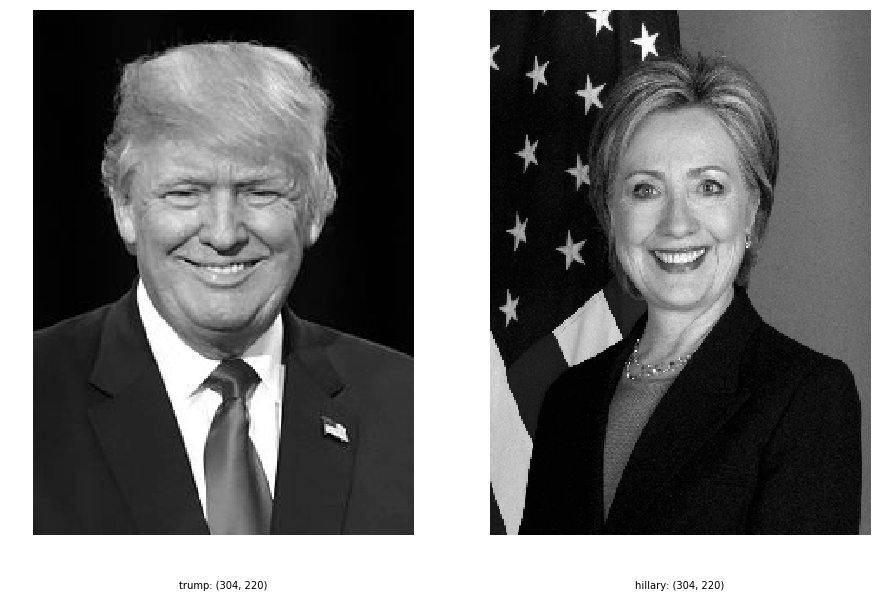

In [7]:
trump = cv2.imread('images/trump.jpg', 0)
hillary = cv2.imread('images/hillary.jpg', 0)
hillary = cv2.resize(hillary, (220,304))

plt.figure(figsize=(15,10))
ax1 = plt.subplot(121)
ax1.imshow(trump, cmap='gray')
ax2 = plt.subplot(122)
ax2.imshow(hillary, cmap='gray')

ax1.axis('off')
ax2.axis('off')

ax1.text(0.5,-0.1, "trump: " + str(trump.shape), ha="center", transform=ax1.transAxes)
ax2.text(0.5,-0.1, "hillary: " + str(hillary.shape), ha="center", transform=ax2.transAxes)

plt.show()

/home/viniciuscampos/miniconda3/envs/dip/lib/python3.7/site-packages/ipykernel_launcher.py:15: ComplexWarning: Casting complex values to real discards the imaginary part
  from ipykernel import kernelapp as app
/home/viniciuscampos/miniconda3/envs/dip/lib/python3.7/site-packages/ipykernel_launcher.py:32: ComplexWarning: Casting complex values to real discards the imaginary part


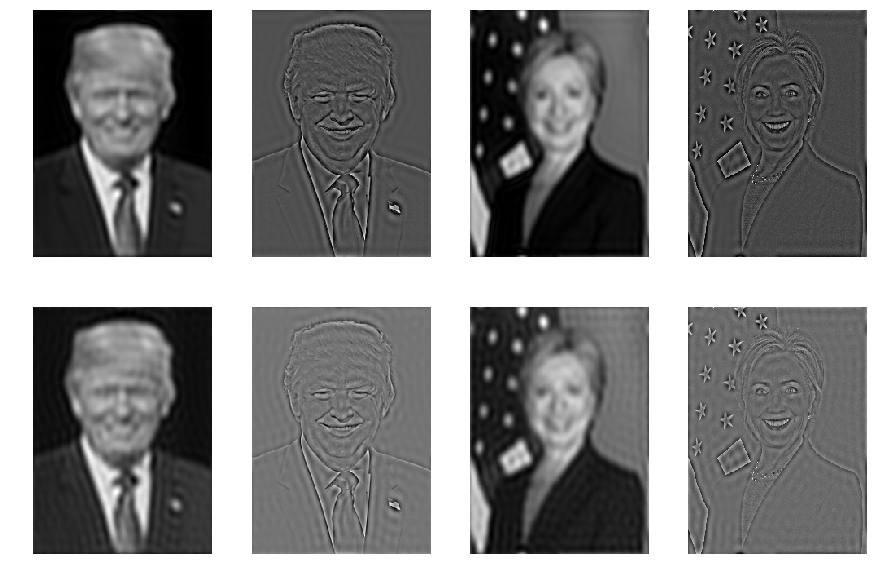

In [8]:
trump_low = lowpass_butterworth(trump, 20, 10)
trump_high = highpass_butterworth(trump, 20, 10)
trump_low_ideal = ideal_lowpass(trump, 20)
trump_high_ideal = ideal_highpass(trump, 20)

hillary_low = lowpass_butterworth(hillary, 20, 10)
hillary_high = highpass_butterworth(hillary, 20, 10)
hillary_low_ideal = ideal_lowpass(hillary, 20)
hillary_high_ideal = ideal_highpass(hillary, 20)

plt.figure(figsize=(15,10))
ax1 = plt.subplot(241)
ax1.imshow(trump_low, cmap='gray')
ax2 = plt.subplot(242)
ax2.imshow(trump_high, cmap='gray')
ax3 = plt.subplot(243)
ax3.imshow(hillary_low, cmap='gray')
ax4 = plt.subplot(244)
ax4.imshow(hillary_high, cmap='gray')
ax5 = plt.subplot(245)
ax5.imshow(trump_low_ideal, cmap='gray')
ax6 = plt.subplot(246)
ax6.imshow(trump_high_ideal, cmap='gray')
ax7 = plt.subplot(247)
ax7.imshow(hillary_low_ideal, cmap='gray')
ax8 = plt.subplot(248)
ax8.imshow(hillary_high_ideal, cmap='gray')

ax1.axis('off')
ax2.axis('off')
ax3.axis('off')
ax4.axis('off')
ax5.axis('off')
ax6.axis('off')
ax7.axis('off')
ax8.axis('off')

plt.show()

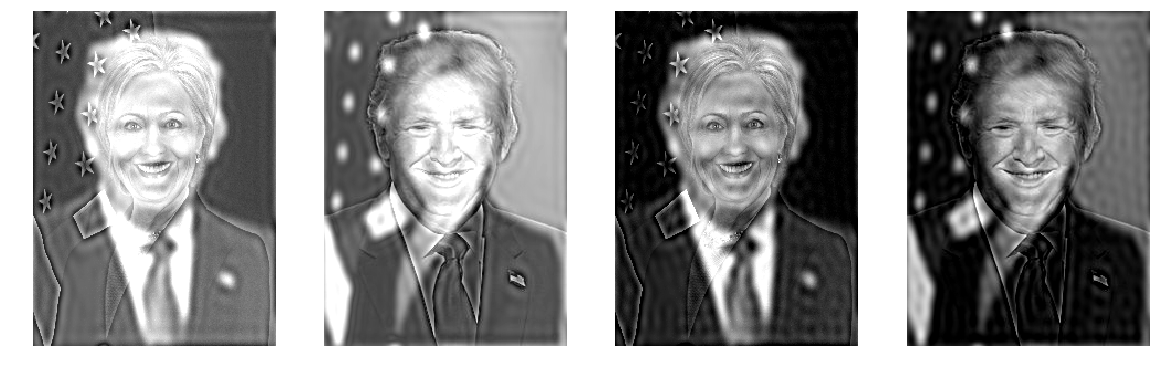

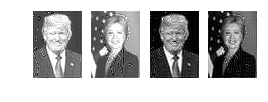

In [22]:
trump_hillary = trump_low + hillary_high
hillary_trump = hillary_low + trump_high

trump_hillary_ideal = trump_low_ideal + hillary_high_ideal
hillary_trump_ideal = hillary_low_ideal + trump_high_ideal

trump_hillary[trump_hillary > 255] = 255
trump_hillary[trump_hillary < 0] = 0
hillary_trump[hillary_trump > 255] = 255
hillary_trump[hillary_trump < 0] = 0
trump_hillary_ideal[trump_hillary_ideal > 255] = 255
trump_hillary_ideal[trump_hillary_ideal < 0] = 0
hillary_trump_ideal[hillary_trump_ideal > 255] = 255
hillary_trump_ideal[hillary_trump_ideal < 0] = 0

plt.figure(figsize=(20,10))
ax1 = plt.subplot(141)
ax1.imshow(trump_hillary, cmap='gray')
ax2 = plt.subplot(142)
ax2.imshow(hillary_trump, cmap='gray')
ax3 = plt.subplot(143)
ax3.imshow(trump_hillary_ideal, cmap='gray')
ax4 = plt.subplot(144)
ax4.imshow(hillary_trump_ideal, cmap='gray')
ax1.axis('off')
ax2.axis('off')
ax3.axis('off')
ax4.axis('off')
plt.show()

cv2.imwrite('images/trump_hillary.jpg', trump_hillary)
cv2.imwrite('images/hillary_trump.jpg', hillary_trump)
cv2.imwrite('images/trump_hillary_ideal.jpg', trump_hillary_ideal)
cv2.imwrite('images/hillary_trump_ideal.jpg', hillary_trump_ideal)

plt.figure(figsize=(4, 4))
ax1 = plt.subplot(141)
ax1.imshow(trump_hillary, cmap='gray')
ax2 = plt.subplot(142)
ax2.imshow(hillary_trump, cmap='gray')
ax3 = plt.subplot(143)
ax3.imshow(trump_hillary_ideal, cmap='gray')
ax4 = plt.subplot(144)
ax4.imshow(hillary_trump_ideal, cmap='gray')
ax1.axis('off')
ax2.axis('off')
ax3.axis('off')
ax4.axis('off')
plt.show()

### More examples

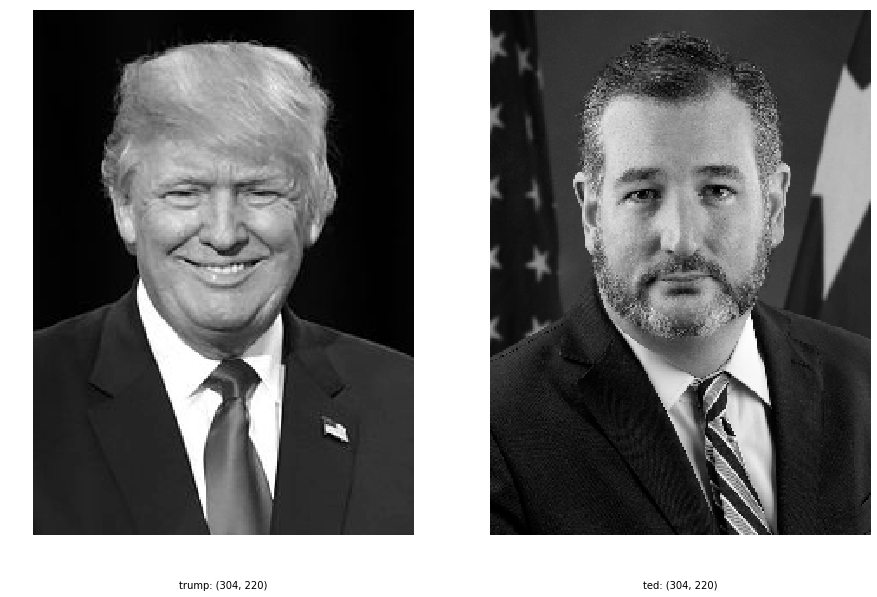

In [23]:
ted = cv2.imread('images/ted.jpg', 0)
ted = cv2.resize(ted, (220,304))

plt.figure(figsize=(15,10))
ax1 = plt.subplot(121)
ax1.imshow(trump, cmap='gray')
ax2 = plt.subplot(122)
ax2.imshow(ted, cmap='gray')

ax1.axis('off')
ax2.axis('off')

ax1.text(0.5,-0.1, "trump: " + str(trump.shape), ha="center", transform=ax1.transAxes)
ax2.text(0.5,-0.1, "ted: " + str(ted.shape), ha="center", transform=ax2.transAxes)

plt.show()

/home/viniciuscampos/miniconda3/envs/dip/lib/python3.7/site-packages/ipykernel_launcher.py:15: ComplexWarning: Casting complex values to real discards the imaginary part
  from ipykernel import kernelapp as app
/home/viniciuscampos/miniconda3/envs/dip/lib/python3.7/site-packages/ipykernel_launcher.py:32: ComplexWarning: Casting complex values to real discards the imaginary part


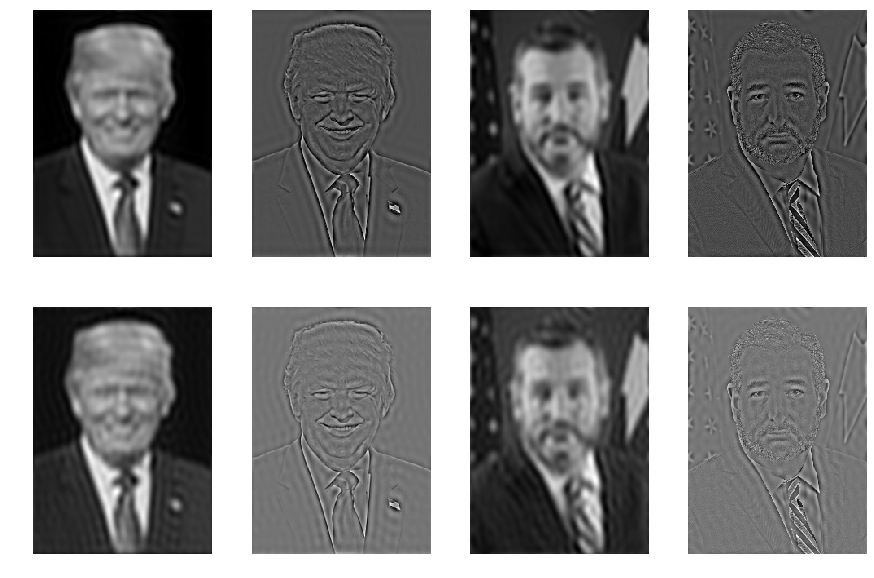

In [24]:
trump_low = lowpass_butterworth(trump, 20, 10)
trump_high = highpass_butterworth(trump, 20, 10)
trump_low_ideal = ideal_lowpass(trump, 20)
trump_high_ideal = ideal_highpass(trump, 20)

ted_low = lowpass_butterworth(ted, 20, 10)
ted_high = highpass_butterworth(ted, 20, 10)
ted_low_ideal = ideal_lowpass(ted, 20)
ted_high_ideal = ideal_highpass(ted, 20)

plt.figure(figsize=(15,10))
ax1 = plt.subplot(241)
ax1.imshow(trump_low, cmap='gray')
ax2 = plt.subplot(242)
ax2.imshow(trump_high, cmap='gray')
ax3 = plt.subplot(243)
ax3.imshow(ted_low, cmap='gray')
ax4 = plt.subplot(244)
ax4.imshow(ted_high, cmap='gray')
ax5 = plt.subplot(245)
ax5.imshow(trump_low_ideal, cmap='gray')
ax6 = plt.subplot(246)
ax6.imshow(trump_high_ideal, cmap='gray')
ax7 = plt.subplot(247)
ax7.imshow(ted_low_ideal, cmap='gray')
ax8 = plt.subplot(248)
ax8.imshow(ted_high_ideal, cmap='gray')

ax1.axis('off')
ax2.axis('off')
ax3.axis('off')
ax4.axis('off')
ax5.axis('off')
ax6.axis('off')
ax7.axis('off')
ax8.axis('off')

plt.show()

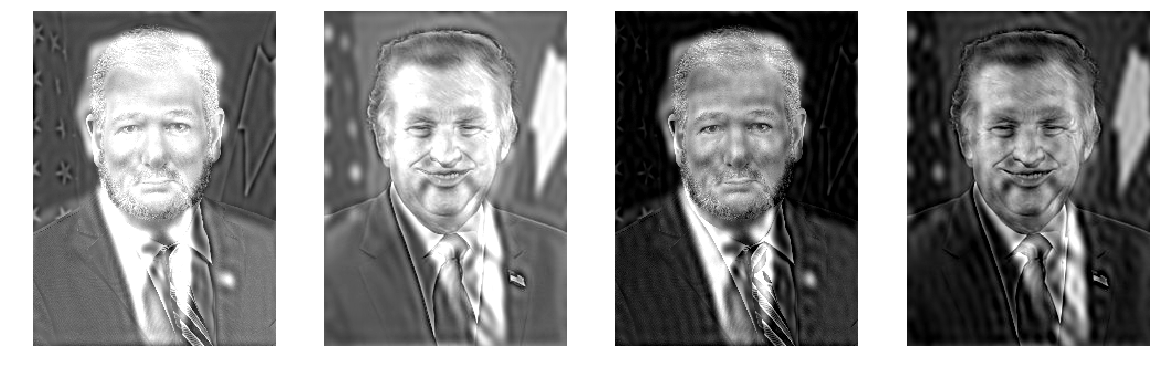

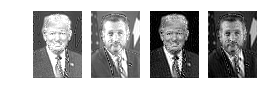

In [25]:
trump_ted = trump_low + ted_high
ted_trump = ted_low + trump_high
trump_ted_ideal = trump_low_ideal + ted_high_ideal
ted_trump_ideal = ted_low_ideal + trump_high_ideal

trump_ted[trump_ted > 255] = 255
trump_ted[trump_ted < 0] = 0
ted_trump[ted_trump > 255] = 255
ted_trump[ted_trump < 0] = 0
trump_ted_ideal[trump_ted_ideal > 255] = 255
trump_ted_ideal[trump_ted_ideal < 0] = 0
ted_trump_ideal[ted_trump_ideal > 255] = 255
ted_trump_ideal[ted_trump_ideal < 0] = 0

plt.figure(figsize=(20,10))
ax1 = plt.subplot(141)
ax1.imshow(trump_ted, cmap='gray')
ax2 = plt.subplot(142)
ax2.imshow(ted_trump, cmap='gray')
ax3 = plt.subplot(143)
ax3.imshow(trump_ted_ideal, cmap='gray')
ax4 = plt.subplot(144)
ax4.imshow(ted_trump_ideal, cmap='gray')
ax1.axis('off')
ax2.axis('off')
ax3.axis('off')
ax4.axis('off')

plt.show()

cv2.imwrite('images/trump_ted.jpg', trump_ted)
cv2.imwrite('images/ted_trump.jpg', ted_trump)
cv2.imwrite('images/trump_ted_ideal.jpg', trump_ted_ideal)
cv2.imwrite('images/ted_trump_ideal.jpg', ted_trump_ideal)

plt.figure(figsize=(4,4))
ax1 = plt.subplot(141)
ax1.imshow(trump_ted, cmap='gray')
ax2 = plt.subplot(142)
ax2.imshow(ted_trump, cmap='gray')
ax3 = plt.subplot(143)
ax3.imshow(trump_ted_ideal, cmap='gray')
ax4 = plt.subplot(144)
ax4.imshow(ted_trump_ideal, cmap='gray')
ax1.axis('off')
ax2.axis('off')
ax3.axis('off')
ax4.axis('off')
plt.show()

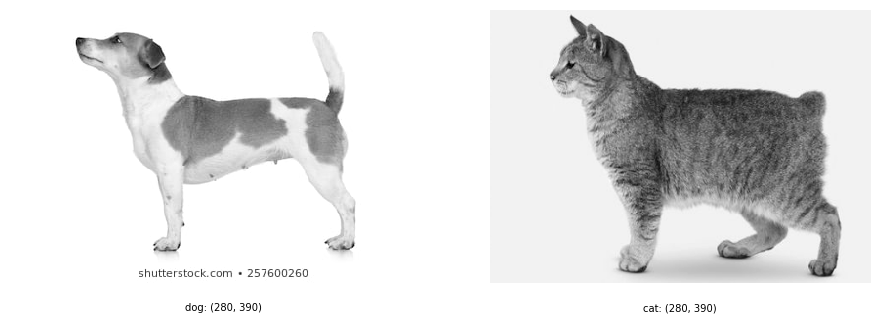

In [32]:
dog = cv2.imread('images/dog.jpg', 0)
cat = cv2.imread('images/cat.jpg', 0)
cat = cv2.flip(cat,1)
cat = cv2.resize(cat, (390,280))

plt.figure(figsize=(15,10))
ax1 = plt.subplot(121)
ax1.imshow(dog, cmap='gray')
ax2 = plt.subplot(122)
ax2.imshow(cat, cmap='gray')

ax1.axis('off')
ax2.axis('off')

ax1.text(0.5,-0.1, "dog: " + str(dog.shape), ha="center", transform=ax1.transAxes)
ax2.text(0.5,-0.1, "cat: " + str(cat.shape), ha="center", transform=ax2.transAxes)

plt.show()

/home/viniciuscampos/miniconda3/envs/dip/lib/python3.7/site-packages/ipykernel_launcher.py:14: ComplexWarning: Casting complex values to real discards the imaginary part
  
/home/viniciuscampos/miniconda3/envs/dip/lib/python3.7/site-packages/ipykernel_launcher.py:31: ComplexWarning: Casting complex values to real discards the imaginary part
/home/viniciuscampos/miniconda3/envs/dip/lib/python3.7/site-packages/ipykernel_launcher.py:49: ComplexWarning: Casting complex values to real discards the imaginary part


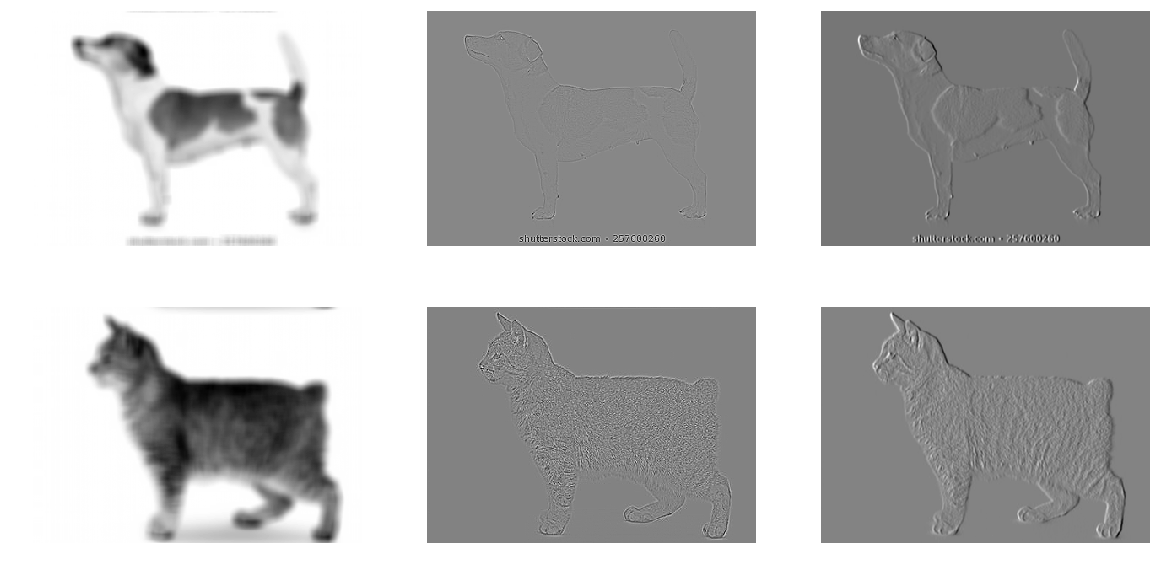

In [33]:
dog_low = blur(dog, 11)
dog_high_laplacian = laplacian(dog)
dog_high_sobel = sobelx(dog)

cat_low = blur(cat, 11)
cat_high_laplacian = laplacian(cat)
cat_high_sobel = sobelx(cat)

plt.figure(figsize=(20,10))
ax1 = plt.subplot(231)
ax1.imshow(dog_low, cmap='gray')
ax2 = plt.subplot(232)
ax2.imshow(dog_high_laplacian, cmap='gray')
ax3 = plt.subplot(233)
ax3.imshow(dog_high_sobel, cmap='gray')
ax4 = plt.subplot(234)
ax4.imshow(cat_low, cmap='gray')
ax5 = plt.subplot(235)
ax5.imshow(cat_high_laplacian, cmap='gray')
ax6 = plt.subplot(236)
ax6.imshow(cat_high_sobel, cmap='gray')

ax1.axis('off')
ax2.axis('off')
ax3.axis('off')
ax4.axis('off')
ax5.axis('off')
ax6.axis('off')

plt.show()

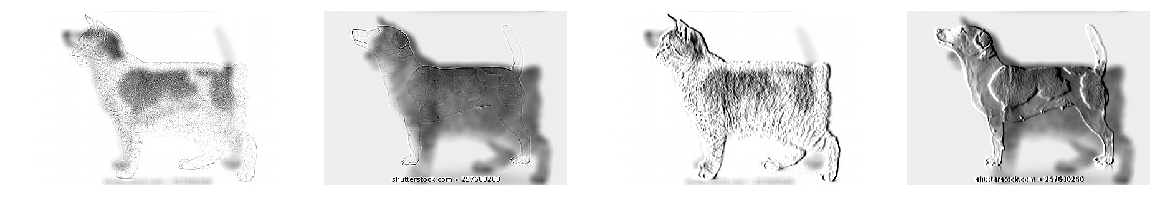

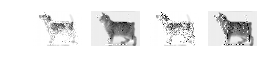

In [34]:
dog_cat_laplacian = dog_low + cat_high_laplacian
cat_dog_laplacian = cat_low + dog_high_laplacian

dog_cat_sobel = dog_low + cat_high_sobel
cat_dog_sobel = cat_low + dog_high_sobel

dog_cat_laplacian[dog_cat_laplacian > 255] = 255
dog_cat_laplacian[dog_cat_laplacian < 0] = 0
cat_dog_laplacian[cat_dog_laplacian > 255] = 255
cat_dog_laplacian[cat_dog_laplacian < 0] = 0
dog_cat_sobel[dog_cat_sobel > 255] = 255
dog_cat_sobel[dog_cat_sobel < 0] = 0
cat_dog_sobel[cat_dog_sobel > 255] = 255
cat_dog_sobel[cat_dog_sobel < 0] = 0

plt.figure(figsize=(20,10))
ax1 = plt.subplot(141)
ax1.imshow(dog_cat_laplacian, cmap='gray')
ax2 = plt.subplot(142)
ax2.imshow(cat_dog_laplacian, cmap='gray')
ax3 = plt.subplot(143)
ax3.imshow(dog_cat_sobel, cmap='gray')
ax4 = plt.subplot(144)
ax4.imshow(cat_dog_sobel, cmap='gray')
ax1.axis('off')
ax2.axis('off')
ax3.axis('off')
ax4.axis('off')

plt.show()

cv2.imwrite('images/dog_cat_laplacian.jpg', dog_cat_laplacian)
cv2.imwrite('images/dog_cat_sobel.jpg', dog_cat_sobel)
cv2.imwrite('images/cat_dog_laplacian.jpg', cat_dog_laplacian)
cv2.imwrite('images/cat_dog_sobel.jpg', cat_dog_sobel)

plt.figure(figsize=(4,4))
ax1 = plt.subplot(141)
ax1.imshow(dog_cat_laplacian, cmap='gray')
ax2 = plt.subplot(142)
ax2.imshow(cat_dog_laplacian, cmap='gray')
ax3 = plt.subplot(143)
ax3.imshow(dog_cat_sobel, cmap='gray')
ax4 = plt.subplot(144)
ax4.imshow(cat_dog_sobel, cmap='gray')
ax1.axis('off')
ax2.axis('off')
ax3.axis('off')
ax4.axis('off')
plt.show()

## Mixed method

In [40]:
def ideal_filters(img1, img2, d0):
    h,w = img1.shape
    
    fft1 = np.fft.fft2(img1)    
    fft2 = np.fft.fft2(img2)
    fft1 = np.fft.fftshift(fft1)
    fft2 = np.fft.fftshift(fft2)
    
    for row in range(h):
        for col in range(w):
            du = row - h / 2
            dv = col - w / 2
            if sqrt( du**2 + dv**2 ) > d0:
                fft1[row,col] = 0
            else:
                fft2[row,col] = 0
    
    result = fft1 + fft2    
    result = np.fft.fftshift(result)    
    real_img = np.fft.ifft2(result).astype('int')
    
    return real_img

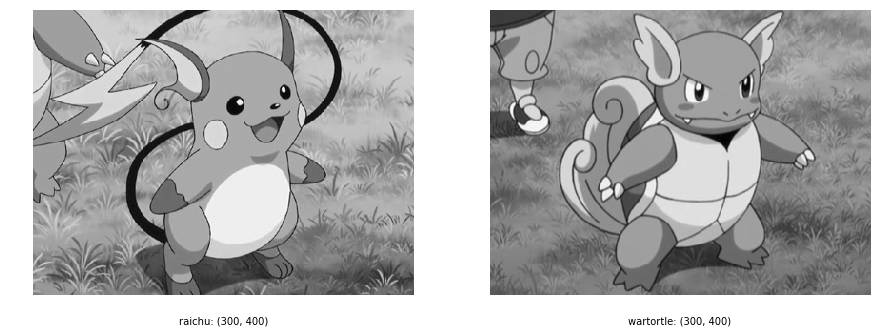

In [41]:
wartortle = cv2.imread('images/wartortle.png', 0)
raichu = cv2.imread('images/raichu.png', 0)
raichu = cv2.resize(raichu, (400,300))

plt.figure(figsize=(15,10))
ax1 = plt.subplot(121)
ax1.imshow(raichu, cmap='gray')
ax2 = plt.subplot(122)
ax2.imshow(wartortle, cmap='gray')

ax1.axis('off')
ax2.axis('off')

ax1.text(0.5,-0.1, "raichu: " + str(raichu.shape), ha="center", transform=ax1.transAxes)
ax2.text(0.5,-0.1, "wartortle: " + str(wartortle.shape), ha="center", transform=ax2.transAxes)

plt.show()

/home/viniciuscampos/miniconda3/envs/dip/lib/python3.7/site-packages/ipykernel_launcher.py:21: ComplexWarning: Casting complex values to real discards the imaginary part


(-0.5, 399.5, 299.5, -0.5)

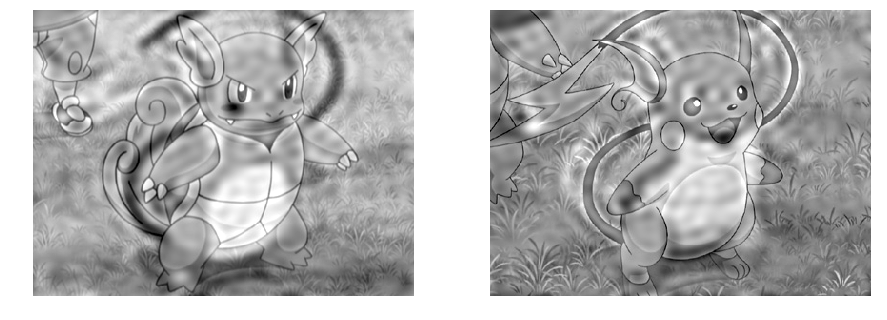

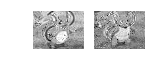

In [49]:
raichu_wartortle = ideal_filters(raichu,wartortle, 20)
wartortle_raichu = ideal_filters(wartortle,raichu, 20)

raichu_wartortle[raichu_wartortle > 255] = 255
raichu_wartortle[raichu_wartortle < 0] = 0
wartortle_raichu[wartortle_raichu > 255] = 255
wartortle_raichu[wartortle_raichu < 0] = 0

cv2.imwrite('images/raichu_wartortle.png', raichu_wartortle)
cv2.imwrite('images/wartortle_raichu.png', wartortle_raichu)

plt.figure(figsize=(15,10))
ax1 = plt.subplot(121)
ax1.imshow(raichu_wartortle, cmap='gray')
ax2 = plt.subplot(122)
ax2.imshow(wartortle_raichu, cmap='gray')
ax1.axis('off')
ax2.axis('off')

plt.figure(figsize=(2,2))
ax1 = plt.subplot(121)
ax1.imshow(raichu_wartortle, cmap='gray')
ax2 = plt.subplot(122)
ax2.imshow(wartortle_raichu, cmap='gray')
ax1.axis('off')
ax2.axis('off')

In [51]:
def butterworth_filters(img1, img2, d0, n = 1):
    h,w = img1.shape
    
    fft1 = np.fft.fft2(img1)    
    fft2 = np.fft.fft2(img2)
    fft1 = np.fft.fftshift(fft1)
    fft2 = np.fft.fftshift(fft2)
    
    for row in range(h):
        for col in range(w):
            du = row - h / 2
            dv = col - w / 2
            root = sqrt( du**2 + dv**2 )
            if d0 != 0:
                fft1[row,col] *= 1.0 / sqrt( 1.0 + (root / d0) ** (2*n) )
            if root != 0:
                fft2[row,col] *= 1.0 / sqrt( 1.0 + (d0 / root) ** (2*n) )
    
    result = fft1 + fft2    
    result = np.fft.fftshift(result)    
    real_img = np.fft.ifft2(result).astype('int')
    
    return real_img

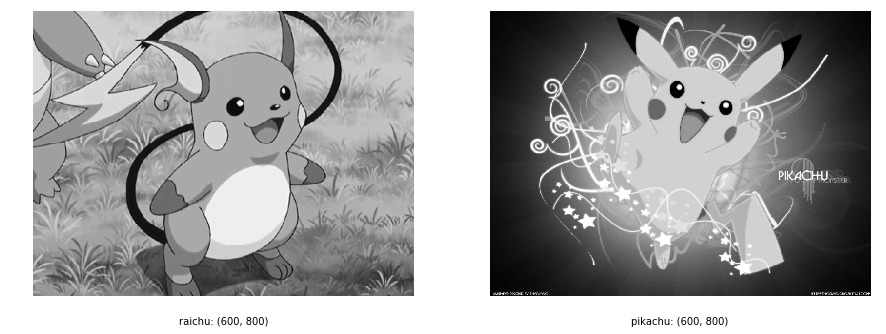

In [54]:
pikachu = cv2.imread('images/pikachu.jpg', 0)
raichu = cv2.imread('images/raichu.png', 0)
pikachu = cv2.resize(pikachu, (800,600))

plt.figure(figsize=(15,10))
ax1 = plt.subplot(121)
ax1.imshow(raichu, cmap='gray')
ax2 = plt.subplot(122)
ax2.imshow(pikachu, cmap='gray')

ax1.axis('off')
ax2.axis('off')

ax1.text(0.5,-0.1, "raichu: " + str(raichu.shape), ha="center", transform=ax1.transAxes)
ax2.text(0.5,-0.1, "pikachu: " + str(pikachu.shape), ha="center", transform=ax2.transAxes)

plt.show()

/home/viniciuscampos/miniconda3/envs/dip/lib/python3.7/site-packages/ipykernel_launcher.py:21: ComplexWarning: Casting complex values to real discards the imaginary part


(-0.5, 799.5, 599.5, -0.5)

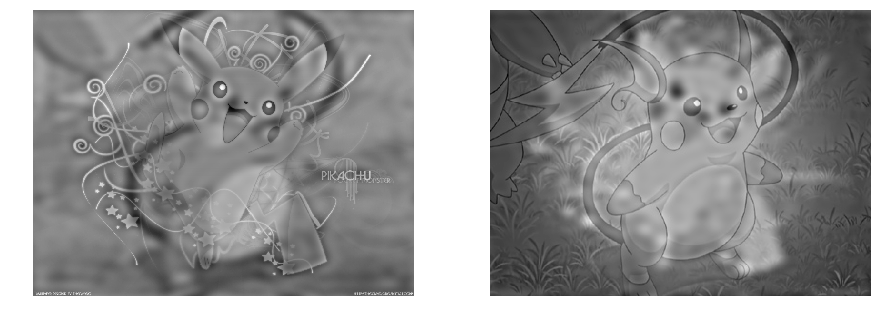

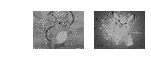

In [57]:
pikachu_wartortle = butterworth_filters(raichu,pikachu, 20, 10)
wartortle_pikachu = butterworth_filters(pikachu,raichu, 20, 10)

#pikachu_wartortle[pikachu_wartortle > 255] = 255
#pikachu_wartortle[pikachu_wartortle < 0] = 0
#wartortle_pikachu[wartortle_pikachu > 255] = 255
#wartortle_pikachu[wartortle_pikachu < 0] = 0

cv2.imwrite('images/pikachu_wartortle.png', pikachu_wartortle)
cv2.imwrite('images/wartortle_pikachu.png', wartortle_pikachu)

plt.figure(figsize=(15,10))
ax1 = plt.subplot(121)
ax1.imshow(pikachu_wartortle, cmap='gray')
ax2 = plt.subplot(122)
ax2.imshow(wartortle_pikachu, cmap='gray')
ax1.axis('off')
ax2.axis('off')

plt.figure(figsize=(2,2))
ax1 = plt.subplot(121)
ax1.imshow(pikachu_wartortle, cmap='gray')
ax2 = plt.subplot(122)
ax2.imshow(wartortle_pikachu, cmap='gray')
ax1.axis('off')
ax2.axis('off')